In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
cm = 1/2.54

#from scipy.interpolate import spline
# jupyter nbconvert xxx.ipynb --no-input

In [2]:
r_77 = np.array([0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.0]) # ATP2000
Ts77 = 0.01
r_ATP500 = np.array([0.70,0.80,0.88,0.90,0.92,0.94,0.96,0.98,1.0])
TsATP500 = 0.01

In [3]:
act_lyf77 = []; def_lyf77 = []
act_lyfATP500 = []; def_lyfATP500 = []

for r  in [70,80,82,84,86,88,90,92,94,96,98,99]: # 99 for simplicity... it is actually 1.00 
    act_lyf_77_ = pd.read_csv('lyfData/S77/actLyf_Ts0.01_S77T5R0.'+str(r)+'.csv', names=['im', 'c', 'xm',	'ym', 'lyf']) # 'x','y','lyf'
    act_lyf77.append(act_lyf_77_)
    try:
        def_lyf_77_ = pd.read_csv('lyfData/S77/defLyf_Ts0.01_S77T5R0.'+str(r)+'.csv', names=['im', 'c', 'xm',	'ym', 'lyf'])
        def_lyf77.append(act_lyf_77_)
    except:
        pass; #print('passed: '+str(r))
    
for r  in [70,80,88,90,92,94,96,98,99]:
    act_lyf_ATP500_ = pd.read_csv('lyfData/ATP500/actLyf_Ts0.01_S77T5ATP500R0.'+str(r)+'.csv', names=['im', 'c', 'xm',	'ym', 'lyf']) # 'x','y','lyf'
    act_lyfATP500.append(act_lyf_ATP500_)
    try:
        def_lyf_ATP500_ = pd.read_csv('lyfData/ATP500/defLyf_Ts0.01_S77T5ATP500R0.'+str(r)+'.csv', names=['im', 'c', 'xm',	'ym', 'lyf'])
        def_lyfATP500.append(act_lyf_ATP500_)
    except:
        pass; #print('passed: '+str(r))    
        

In [4]:
act_77 = []; act_77_m = []; act_77_d = []
def_77 = []; def_77_m = []; def_77_d = []
act_ATP500 = []; act_ATP500_m = []; act_ATP500_d = []
def_ATP500 = []; def_ATP500_m = []; def_ATP500_d = []

act_001 = []; act_001_m = []; act_001_d = []
def_001 = []; def_001_m = []; def_001_d = []
act_0001 = []; act_0001_m = []; act_0001_d = []
def_0001 = []; def_0001_m = []; def_0001_d = []
act_00001 = []; act_00001_m = []; act_00001_d = []
def_00001 = []; def_00001_m = []; def_00001_d = []

for i in range(12):
    act_77 = Ts77*act_lyf77[i]['lyf']
    act_77_m.append(act_77.mean())
    act_77_d.append(act_77.std())
    #def_kd0 = Ts_kd0*def_lyfkd0[i]['lyf']
    #def_kd0_m.append(def_kd0.mean())
    #def_kd0_d.append(def_kd0.std())
    
for i in range(9):
    act_ATP500 = TsATP500*act_lyfATP500[i]['lyf']
    act_ATP500_m.append(act_ATP500.mean())
    act_ATP500_d.append(act_ATP500.std())
    #def_kd0_0001 = Ts_kd0_0001*def_lyfkd0_0001[i]['lyf']
    #def_kd0_m_0001.append(def_kd0_0001.mean())
    #def_kd0_d_0001.append(def_kd0_0001.std())
    

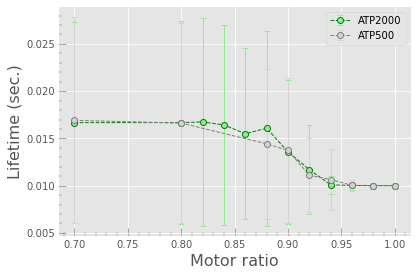

In [10]:
fig, ax = plt.subplots(1,1, figsize=(15*cm,10*cm))

ax.errorbar(r_77,act_77_m,act_77_d, capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='green', marker='o', markerfacecolor='lightgreen', ecolor='lightgreen', label='ATP2000')
ax.errorbar(r_ATP500,act_ATP500_m,act_ATP500_d, capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgray', ecolor='lightgray', label='ATP500')
#ax.errorbar(r_001,act_001_m,act_001_d, capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='red', marker='o', markersize=8, markerfacecolor='none', ecolor='red', label='Ts = 0.01')
#ax.errorbar(r_0001,act_0001_m,act_0001_d, capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='Ts = 0.001')
#ax.errorbar(r_00001,act_00001_m,act_00001_d, capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='blue', marker='o', markersize=8, markerfacecolor='none', ecolor='blue', label='Ts = 0.0001')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.spines['bottom'].set_position(('axes',-0.01))
#ax.spines['left'].set_position(('axes',-0.01))
#ax.spines['left'].set_bounds(0,0.030)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#ax.set_xticks(np.arange(0.68,1.1,step=0.08))
#ax.set_yticks(np.arange(0,0.031,0.005))

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

#for x,y in zip(r,def_m):
#    label = "{:.4f}".format(y)
#    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0.5,10),ha='left', color='blue')
    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

#===============================================================================
#ax.set_title('Active Motor Lifetime', fontsize=18)
ax.set_xlabel('Motor ratio', fontsize=16)
ax.set_ylabel('Lifetime (sec.)', fontsize=16)
ax.legend()

#fig.text(0.5,-0.05,'Motor ratio', ha='center', fontsize= 16)

fig.tight_layout()
#plt.savefig('fig/v11aBindingMotorRatio.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/v11aBindingMotorRatio.png', fmt='png', dip='1500', bbox_inches='tight')

#plt.savefig('fig/compareLife_ATP500_2000.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [7]:
!jupyter nbconvert 01-03-2021_Ts0.01_lyf_v11n.ipynb --no-input --to html

[NbConvertApp] Converting notebook lifetime_all.ipynb to html
[NbConvertApp] Writing 610947 bytes to lifetime_all.html
